In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [46]:
data = pd.read_csv('BTC-USD.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2075,2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10
2076,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,3.251880e+10
2077,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10
2078,2020-05-26,NaN,NaN,NaN,NaN,NaN,NaN
2079,2020-05-27,8834.157227,8859.578125,8834.157227,8856.885742,8856.885742,2.914432e+10


In [47]:
data_training = data[data['Date']< '2019-03-01'].copy()  #seperated from March
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
1621,2019-02-24,4145.458008,4210.641602,3793.708984,3810.427490,3810.427490,1.079423e+10
1622,2019-02-25,3807.002441,3913.707275,3807.002441,3882.696289,3882.696289,9.318796e+09
1623,2019-02-26,3878.697266,3891.578857,3837.986328,3854.357910,3854.357910,7.931219e+09
1624,2019-02-27,3857.479736,3888.802490,3787.058838,3851.047363,3851.047363,8.301310e+09


In [48]:
data_test = data[data['Date']> '2019-03-01'].copy() #seperated from March
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
1627,2019-03-02,3855.318115,3874.607422,3832.127930,3864.415039,3864.415039,7.578786e+09
1628,2019-03-03,3862.266113,3875.483643,3836.905762,3847.175781,3847.175781,7.253558e+09
1629,2019-03-04,3845.091553,3867.381836,3733.749756,3761.557129,3761.557129,9.029176e+09
1630,2019-03-05,3759.832520,3903.916748,3745.183105,3896.375000,3896.375000,1.017413e+10
1631,2019-03-06,3897.081055,3919.510498,3871.460693,3903.942627,3903.942627,9.175292e+09
...,...,...,...,...,...,...,...
2075,2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10
2076,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,3.251880e+10
2077,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10
2078,2020-05-26,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1) #Drop columns we don't need
training_data.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800.0
1,456.859985,456.859985,413.104004,424.440002,34483200.0
2,424.102997,427.834991,384.532013,394.795990,37919700.0
3,394.673004,423.295990,389.882996,408.903992,36863600.0
4,408.084991,412.425995,393.181000,398.821014,26580100.0


In [50]:
scaler = MinMaxScaler() #scale using minmaxscaler 
training_data = scaler.fit_transform(training_data)
training_data

array([[0.01497323, 0.01290132, 0.01494007, 0.01445348, 0.00063529],
       [0.01450668, 0.01233213, 0.01284898, 0.01275083, 0.0011986 ],
       [0.01280933, 0.01087192, 0.0113294 , 0.0112164 , 0.00134278],
       ...,
       [0.19181402, 0.18512844, 0.19499848, 0.19028927, 0.33250722],
       [0.1907146 , 0.18498877, 0.19228994, 0.19011791, 0.34803442],
       [0.19023697, 0.18585689, 0.19541517, 0.19031139, 0.35216525]])

In [51]:
X_train = []
Y_train = []

In [52]:
training_data.shape[0] #finding the shape of the data

1626

In [53]:
for i in range(60, training_data.shape[0]):   #training dataset of 60 days
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [54]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [55]:
X_train.shape

(1566, 60, 5)

# Building Network

In [56]:
!pip install tensorflow

In [57]:
import tensorflow as tf

In [58]:
!pip install keras 

In [59]:
from tensorflow.keras import Sequential  #for lining stack of layers in a model
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [60]:
regressor = Sequential() #rectified linear activation
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

In [61]:
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True)) 
regressor.add(Dropout(0.3))
#Linear function that will output the input directly if it is positive, otherwise, it will output zero
regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))
#layers for more accuracy
regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units =1))

In [62]:
regressor.summary() #description of layers added

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [63]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') #MSE is more interpretable
#adam used to update network weights

In [64]:
regressor.fit(X_train, Y_train, epochs = 20, batch_size =50)
#epochs define the no. of times an algorithm will work through the entire dataset
#Batch size is the no. of samples to work through

Epoch 1/20
32/32 [==============================] - 2s 69ms/step - loss: 0.0234
Epoch 2/20
32/32 [==============================] - 2s 70ms/step - loss: 0.0059
Epoch 3/20
32/32 [==============================] - 2s 69ms/step - loss: 0.0051
Epoch 4/20
32/32 [==============================] - 2s 68ms/step - loss: 0.0043
Epoch 5/20
32/32 [==============================] - 2s 69ms/step - loss: 0.0040
Epoch 6/20
32/32 [==============================] - 2s 67ms/step - loss: 0.0034
Epoch 7/20
32/32 [==============================] - 2s 67ms/step - loss: 0.0034
Epoch 8/20
32/32 [==============================] - 2s 68ms/step - loss: 0.0033
Epoch 9/20
32/32 [==============================] - 2s 68ms/step - loss: 0.0036
Epoch 10/20
32/32 [==============================] - 2s 70ms/step - loss: 0.0032
Epoch 11/20
32/32 [==============================] - 2s 68ms/step - loss: 0.0032
Epoch 12/20
32/32 [==============================] - 2s 68ms/step - loss: 0.0027
Epoch 13/20
32/32 [==================

 # Testing it out

In [65]:
past_60_days = data_training.tail(60) #again 60 days set
df= past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1) # row wise
df.head()

,Open,High,Low,Close,Volume
0,3866.839111,3868.742920,3725.867432,3742.700439,4.661841e+09
1,3746.713379,3850.913818,3707.231201,3843.520020,4.324201e+09
2,3849.216309,3947.981201,3817.409424,3943.409424,5.244857e+09
3,3931.048584,3935.685059,3826.222900,3836.741211,4.530215e+09
4,3832.040039,3865.934570,3783.853760,3857.717529,4.847965e+09


In [66]:
inputs = scaler.transform(df)
inputs

array([[0.19119957, 0.1839796 , 0.18903553, 0.18450968, 0.19534002],
       [0.18497509, 0.18308264, 0.18804437, 0.18972828, 0.18117429],
       [0.19028642, 0.18796597, 0.19390411, 0.19489872, 0.21980053],
       ...,
       [0.44609842, 0.43966175, 0.45462663, 0.45181931, 1.31245073],
       [       nan,        nan,        nan,        nan,        nan],
       [0.44858819, 0.43506214, 0.46071565, 0.44922869, 1.22250566]])

In [67]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [68]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((453, 60, 5), (453,))

In [69]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

(array([[0.1984548 ],
        [0.19912875],
        [0.19921592],
        [0.19886243],
        [0.19832292],
        [0.19777012],
        [0.19733968],
        [0.1971693 ],
        [0.1973492 ],
        [0.19782801],
        [0.19852275],
        [0.19931182],
        [0.20006765],
        [0.20076536],
        [0.20134622],
        [0.20182456],
        [0.20213243],
        [0.2023119 ],
        [0.20241183],
        [0.20253268],
        [0.20278376],
        [0.2031214 ],
        [0.20349288],
        [0.20381966],
        [0.20410502],
        [0.2043868 ],
        [0.20473215],
        [0.20509323],
        [0.20551227],
        [0.20596954],
        [0.20637739],
        [0.20674473],
        [0.20800802],
        [0.21125546],
        [0.21666922],
        [0.22381759],
        [0.23205015],
        [0.24068755],
        [0.24921328],
        [0.25703195],
        [0.26380798],
        [0.26941213],
        [0.27359402],
        [0.27607042],
        [0.27676934],
        [0

In [70]:
scaler.scale_  #as we have used minmaxscaler values need to be reverted

array([5.18164146e-05, 5.03087220e-05, 5.31841635e-05, 5.17617168e-05,
       4.19551353e-11])

In [71]:
scale = 1/5.18164146e-05 #defining the scale value
scale

19298.903787912797

In [72]:
Y_test = Y_test*scale #multiplying it with a scaler value
Y_pred = Y_pred*scale

In [73]:
Y_pred


array([[ 3829.9602],
       [ 3842.9666],
       [ 3844.649 ],
       [ 3837.8271],
       [ 3827.415 ],
       [ 3816.7466],
       [ 3808.4397],
       [ 3805.1516],
       [ 3808.6235],
       [ 3817.8638],
       [ 3831.2715],
       [ 3846.4998],
       [ 3861.0864],
       [ 3874.5515],
       [ 3885.7615],
       [ 3894.993 ],
       [ 3900.9346],
       [ 3904.398 ],
       [ 3906.3267],
       [ 3908.6587],
       [ 3913.5044],
       [ 3920.0203],
       [ 3927.1897],
       [ 3933.496 ],
       [ 3939.0032],
       [ 3944.4414],
       [ 3951.1062],
       [ 3958.0747],
       [ 3966.1616],
       [ 3974.9866],
       [ 3982.8574],
       [ 3989.9468],
       [ 4014.327 ],
       [ 4076.999 ],
       [ 4181.4785],
       [ 4319.434 ],
       [ 4478.3135],
       [ 4645.006 ],
       [ 4809.543 ],
       [ 4960.435 ],
       [ 5091.205 ],
       [ 5199.359 ],
       [ 5280.065 ],
       [ 5327.8564],
       [ 5341.345 ],
       [ 5325.565 ],
       [ 5287.4688],
       [ 5236

In [74]:
Y_test

array([ 3678.42111389,  3685.36911189,  3668.19455188,  3582.93551884,
        3720.18405391,  3726.48776491,  3736.32882892,  3717.65548891,
        3789.27731495,  3776.84323294,  3726.86129991,  3736.15036192,
        3728.67990292,  3749.76632893,  3787.00314495,  3870.82248099,
        3853.07150498,  3855.79489398,  3893.896944  ,  3907.05685601,
        3851.61764698,  3845.81637798,  3858.26657298,  3847.21579198,
        3792.33175895,  3807.34787196,  3910.68747201,  3891.402804  ,
        3915.23922901,  3928.55905402,  3928.46530402,  3980.02243304,
        4703.06100742,  4794.41061646,  4745.90915144,  4859.8959685 ,
        4885.89694451,  5022.93844858,  5113.02096863,  5027.20846858,
        5148.18454264,  4884.30368351,  4911.95309752,  4918.86178853,
        4990.42477656,  4889.68063651,  5059.2382536 ,  5074.58346861,
        5121.25729663,  5127.26364463,  5158.98190565,  5135.59762864,
        5222.46872268,  5394.61130077,  5289.62741372,  5033.40768759,
      

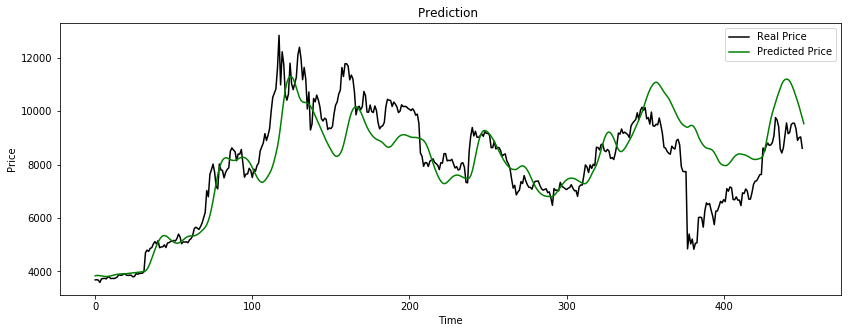

In [75]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'black', label = 'Real Price')
plt.plot(Y_pred, color='green',label='Predicted Price')
plt.title('Prediction ')
xxlabel=plt.xlabel('Time')
yylabel=plt.ylabel('Price')
plt.legend()
plt.show()

In [76]:
#displaying image in browser using mpld3 

In [77]:
pip install mpld3

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mpld3
from mpld3 import plugins
np.random.seed(9615)

# generate df
N = 100
df = pd.DataFrame((.1 * (np.random.random((N, 3)) - .3)).cumsum(0),
                  columns=['BTC', 'ETH', 'YFI',],)

# plot line + confidence interval
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)

for key, val in df.iteritems():
    l, = ax.plot(val.index, val.values, label=key)
    ax.fill_between(val.index,
                    val.values * .5, val.values * 1.5,
                    color=l.get_color(), alpha=.4)

# define interactive legend

handles, labels = ax.get_legend_handles_labels() # return lines and labels
interactive_legend = plugins.InteractiveLegendPlugin(zip(handles,
                                                         ax.collections),
                                                     labels,
                                                     alpha_unsel=0.5,
                                                     alpha_over=1.5, 
                                                     start_visible=True)
plugins.connect(fig, interactive_legend)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Comprehensive analysis', size=20)

mpld3.show()

C:\Users\DELL\anaconda3\lib\site-packages\mpld3\plugins.py:704: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if isinstance(entry, collections.Iterable):



Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [21/Nov/2020 19:32:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Nov/2020 19:32:45] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [21/Nov/2020 19:32:45] "GET /mpld3.js HTTP/1.1" 200 -
